In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

using RobustAssetAllocation
using Dates
using Plots

  Activating project at `~/Documents/RobustAssetAllocation.jl`


In [2]:
start_dt = Dates.Date(2010, 1, 1)
end_dt = Dates.Date(2014, 1, 1)

tickers = Vector{AbstractString}(["AMER3.SA", "ABEV3.SA", "ELET3.SA", "PETR4.SA", "VALE3.SA", "WEGE3.SA"])

portfolio = RobustAssetAllocation.Finance.Portfolio(tickers, start_dt, end_dt)

RobustAssetAllocation.Finance.Portfolio(989, RobustAssetAllocation.Finance.Asset[RobustAssetAllocation.Finance.Asset(989, "AMER3.SA", [Date("2010-01-04"), Date("2010-01-05"), Date("2010-01-06"), Date("2010-01-07"), Date("2010-01-08"), Date("2010-01-11"), Date("2010-01-12"), Date("2010-01-13"), Date("2010-01-14"), Date("2010-01-15")  …  Date("2013-12-13"), Date("2013-12-16"), Date("2013-12-17"), Date("2013-12-18"), Date("2013-12-19"), Date("2013-12-20"), Date("2013-12-23"), Date("2013-12-26"), Date("2013-12-27"), Date("2013-12-30")], [40.92885144525715, 40.567110478062936, 39.55077523562467, 40.45513408235931, 40.30871362242203, 39.51632180330921, 38.49999159745052, 39.13735254740158, 38.99954473239443, 38.4396991676274  …  14.71476178752547, 14.653450521254532, 14.697243079729084, 14.977525659425053, 14.75855475120506, 14.34689339548201, 13.733778034797153, 13.646189581736191, 13.970264218052984, 14.189234617417105], [40.05894088745117, 38.78422279495108, 38.51721537764251, 38.59473014

In [3]:
min_returns = collect(LinRange(0, maximum(portfolio.returns), 1000))

markowitz_model = RobustAssetAllocation.MarkowitzModel.MarkowitzModelData(portfolio.returns, portfolio.cov_matrix, min_returns)

alloc, returns, covs = RobustAssetAllocation.MarkowitzModel.pareto_frontier(markowitz_model)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-03
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Threads to value 12
Set parameter TimeLimit to value 100
Set parameter MIPGap to value 0.001
Set parameter Thr

([[0.00041183320519614774, 0.38603225183274625, 0.07490270930145906, 0.17059838694490995, 0.08769948435380516, 0.2803553343618727], [0.0004111057326751555, 0.3860324524070732, 0.07490283525794518, 0.17059862127353587, 0.08769965175506136, 0.2803553335736993], [0.00041037869614380523, 0.3860326528610154, 0.07490296113922211, 0.1705988554606047, 0.08769981905738712, 0.2803553327856247], [0.0004096520952332119, 0.3860328531946801, 0.07490308694535089, 0.17059908950622074, 0.08769998626086535, 0.2803553319976435], [0.00040892592957309177, 0.3860330534081744, 0.07490321267638862, 0.17059932341052192, 0.08770015336556794, 0.28035533120978484], [0.0004082001987900097, 0.38603325350161266, 0.07490333833239635, 0.17059955717359776, 0.08770032037158709, 0.2803553304220216], [0.0004074749025085077, 0.38603345347510026, 0.07490346391343632, 0.17059979079558138, 0.08770048727900295, 0.28035532963436643], [0.0004067500403504274, 0.3860336533287514, 0.07490358941956775, 0.17060002427659834, 0.0877006

In [4]:
α = 0.05
robust_markowitz_model = RobustAssetAllocation.RobustMarkowitzModel.RobustMarkowitzModelData(portfolio.n, portfolio.returns, portfolio.cov_matrix, min_returns, α)

robust_markowitz_model

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-03


RobustAssetAllocation.RobustMarkowitzModel.RobustMarkowitzModelData(989, ([-0.0005693424071183411, 0.0012531846020560394, -0.0010964374927753325, -0.0005083645315812022, -5.453508573458265e-5, 0.0007632140941060533], [-0.00041188753904656714, 0.0012829085848793987, -0.0010147517645548506, -0.00045980540077373146, -9.320380445903583e-6, 0.0008002919440891577]), ([0.0011574005960875062 -2.528822300530713e-7 … -3.8467238971783427e-7 -3.1544660232854115e-7; -2.528822300530713e-7 0.00021849153258423926 … -7.261760556924482e-8 -5.9549314061389236e-8; … ; -3.8467238971783427e-7 -7.261760556924482e-8 … 0.00033235890064182305 -9.058357695297546e-8; -3.1544660232854115e-7 -5.9549314061389236e-8 … -9.058357695297546e-8 0.0002725474683483674], [0.0013807547008189678 3.5990175981156854e-7 … 5.474653951814462e-7 4.4894331753083635e-7; 3.5990175981156854e-7 0.00026065582800340986 … 1.0334931019941057e-7 8.475052961122633e-8; … ; 5.474653951814462e-7 1.0334931019941057e-7 … 0.00039649721623741545 1.28

In [5]:
robust_markowitz_model.cov_interval[1]

6×6 Matrix{Float64}:
  0.0011574   -2.52882e-7   -6.94956e-7   …  -3.84672e-7   -3.15447e-7
 -2.52882e-7   0.000218492  -1.31192e-7      -7.26176e-8   -5.95493e-8
 -6.94956e-7  -1.31192e-7    0.000600446     -1.99563e-7   -1.6365e-7
 -4.13126e-7  -7.7989e-8    -2.14325e-7      -1.18633e-7   -9.72838e-8
 -3.84672e-7  -7.26176e-8   -1.99563e-7       0.000332359  -9.05836e-8
 -3.15447e-7  -5.95493e-8   -1.6365e-7    …  -9.05836e-8    0.000272547

In [6]:
robust_markowitz_model.cov_interval[2] 

6×6 Matrix{Float64}:
 0.00138075  3.59902e-7   9.89061e-7   5.8796e-7    5.47465e-7   4.48943e-7
 3.59902e-7  0.000260656  1.86713e-7   1.10994e-7   1.03349e-7   8.47505e-8
 9.89061e-7  1.86713e-7   0.000716319  3.05027e-7   2.84019e-7   2.32906e-7
 5.8796e-7   1.10994e-7   3.05027e-7   0.000425825  1.68838e-7   1.38454e-7
 5.47465e-7  1.03349e-7   2.84019e-7   1.68838e-7   0.000396497  1.28918e-7
 4.48943e-7  8.47505e-8   2.32906e-7   1.38454e-7   1.28918e-7   0.000325143

In [9]:
robust_markowitz_model.return_interval[1] 

6-element Vector{Float64}:
 -0.0005693424071183411
  0.0012531846020560394
 -0.0010964374927753325
 -0.0005083645315812022
 -5.453508573458265e-5
  0.0007632140941060533

In [10]:
robust_markowitz_model.return_interval[2] 

6-element Vector{Float64}:
 -0.00041188753904656714
  0.0012829085848793987
 -0.0010147517645548506
 -0.00045980540077373146
 -9.320380445903583e-6
  0.0008002919440891577

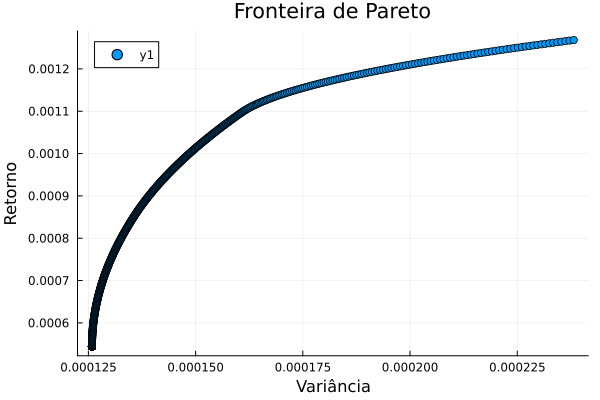

In [7]:
scatter(covs, returns; 
    title = "Fronteira de Pareto", 
    xlabel = "Variância",
    ylabel = "Retorno")